In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%%capture
!pip install pathlib

In [3]:
# Set Environmental Variables -- Must Edit set.env file
import os
import shutil
from pathlib import Path
from dotenv import load_dotenv
env_path = Path('.') / 'set.env'
load_dotenv(dotenv_path=env_path)

skin_cancer_bucket=os.environ.get('SKIN_CANCER_BUCKET')
skin_cancer_bucket_path=os.environ.get('SKIN_CANCER_BUCKET_PATH')
skin_cancer_files=os.environ.get('SKIN_CANCER_FILES')
skin_cancer_files_ext=os.environ.get('SKIN_CANCER_FILES_EXT')
base_dir = os.environ.get('BASE_DIR')

In [4]:
# Check if environmental variables were defined correctly
print(skin_cancer_bucket)

skin-cancer-project


In [5]:
# Downloading Image Data
import boto3

#cleanup previous runs
if os.path.exists(os.path.join(base_dir,skin_cancer_files)):
    shutil.rmtree(base_dir+skin_cancer_files)
    
if os.path.exists(os.path.join(base_dir,skin_cancer_files_ext)):
    os.remove(os.path.join(base_dir,skin_cancer_files_ext))    

data_dir = os.path.join(base_dir,'HAM10000')

if os.path.exists(os.path.join(base_dir,'HAM10000.tar.gz')):
    os.remove(os.path.join(base_dir,'HAM10000.tar.gz'))

if os.path.exists(data_dir):
    shutil.rmtree(data_dir)
    
s3 = boto3.client('s3')
s3.download_file(skin_cancer_bucket, skin_cancer_bucket_path+'/'+skin_cancer_files_ext,base_dir+skin_cancer_files_ext)

print('Download training data set from '+skin_cancer_bucket)

Download training data set from skin-cancer-project


In [6]:
%%capture
!pip install torchtext

In [7]:
%%capture
import torchtext
from numpy.random import seed
seed(101)
import pandas as pd
import numpy as np
import os

os.mkdir(base_dir+skin_cancer_files)
os.mkdir(base_dir+skin_cancer_files+'/HAM_images_part_1')
os.mkdir(base_dir+skin_cancer_files+'/HAM_images_part_2')

print('Uncompress data set for transformation')
torchtext.utils.extract_archive(base_dir+skin_cancer_files_ext, base_dir+skin_cancer_files)
torchtext.utils.extract_archive(base_dir+skin_cancer_files+'/HAM10000_images_part_1.zip', base_dir+skin_cancer_files+'/HAM_images_part_1')
torchtext.utils.extract_archive(base_dir+skin_cancer_files+'/HAM10000_images_part_2.zip', base_dir+skin_cancer_files+'/HAM_images_part_2')

In [10]:
# Uncomment to Check if the download worked
#!ls {'../dataverse_files/HAM_images_part_2'}
#!ls {'../dataverse_files/HAM_images_part_1'}

In [8]:
# Run if you made the train/test directories already
import shutil

shutil.rmtree('../train')
shutil.rmtree('../test')

In [9]:
# Creating Directories for Train Test and Subdirecories for Each Cancer Type 

# Train Directory Setup
train_dir = base_dir + '/train'
os.mkdir(train_dir)
bkl_dir= train_dir + '/bkl'
os.mkdir(bkl_dir)
nv_dir= train_dir + '/nv'
os.mkdir(nv_dir)
df_dir= train_dir + '/df'
os.mkdir(df_dir)
mel_dir= train_dir + '/mel'
os.mkdir(mel_dir)
vasc_dir= train_dir + '/vasc'
os.mkdir(vasc_dir)
bcc_dir= train_dir + '/bcc'
os.mkdir(bcc_dir)
akiec_dir= train_dir + '/akiec'
os.mkdir(akiec_dir)

# Test Directory Setup 
test_dir = base_dir + '/test'
os.mkdir(test_dir)
bkl_dir= test_dir + '/bkl'
os.mkdir(bkl_dir)
nv_dir= test_dir + '/nv'
os.mkdir(nv_dir)
df_dir= test_dir + '/df'
os.mkdir(df_dir)
mel_dir= test_dir + '/mel'
os.mkdir(mel_dir)
vasc_dir= test_dir + '/vasc'
os.mkdir(vasc_dir)
bcc_dir= test_dir + '/bcc'
os.mkdir(bcc_dir)
akiec_dir= test_dir + '/akiec'
os.mkdir(akiec_dir)

In [10]:
# Read in Metafile
meta_data = pd.read_csv('HAM10000_metadata')
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [11]:
meta_data['dx'].count()

10015

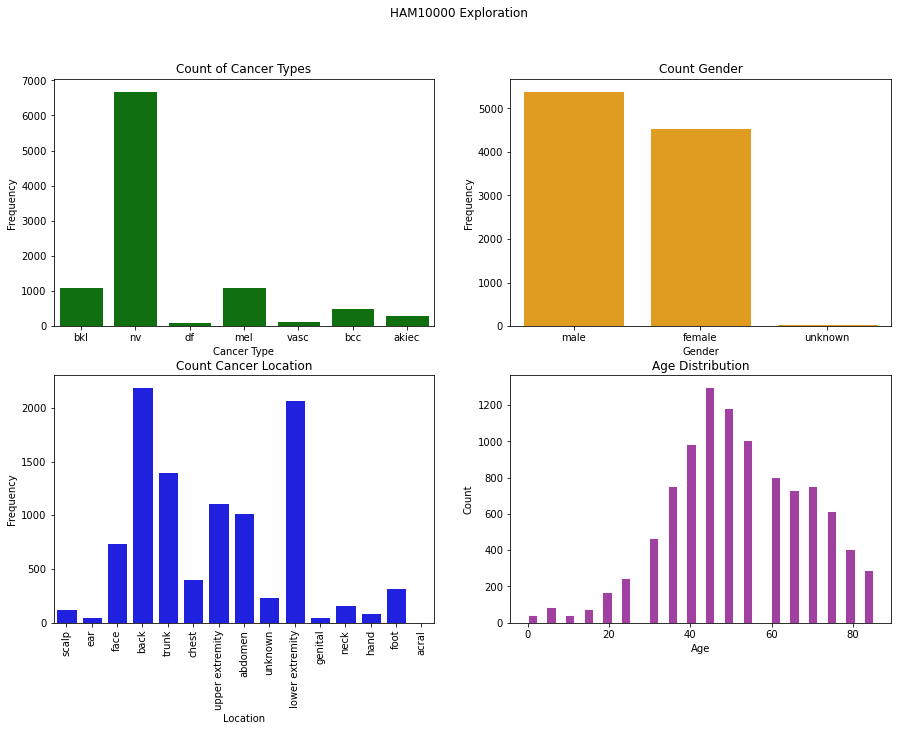

In [12]:
# Do Some EDA on the Data Set 
import seaborn as sns
import matplotlib
fig, axes = plt.subplots(2,2, figsize=(15,10)) 
plt.suptitle('HAM10000 Exploration')
sns.set_style('darkgrid')

ax = sns.countplot(x = 'dx', data = meta_data, color = 'green', ax = axes[0,0])
_ = ax.set_title('Count of Cancer Types')
_ = ax.set(xlabel = 'Cancer Type', ylabel = 'Frequency')

ax1 = sns.countplot(x = 'sex', data = meta_data, color = 'orange', ax = axes[0,1])
_ = ax1.set_title('Count Gender')
_ = ax1.set(xlabel = 'Gender', ylabel = 'Frequency')

ax2 = sns.countplot(x = 'localization', data = meta_data, color = 'blue', ax = axes[1,0])
_ = ax2.set_title('Count Cancer Location')
_ = ax2.set(xlabel = 'Location', ylabel = 'Frequency')
_ = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

ax3 = sns.histplot(x = meta_data['age'], color = 'purple', ax = axes[1,1])
_ = ax3.set_title('Age Distribution')
_ = ax3.set(xlabel = "Age")


In [13]:
# Counts dxs 
meta_data['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [14]:
meta_data = meta_data.reset_index()

In [15]:
meta_data = meta_data.drop('index', axis = 1)

In [14]:
# Splitting the images_id into train and test sets 
from sklearn.model_selection import train_test_split
target = meta_data['dx']
train_df, test_df = train_test_split(meta_data, test_size=0.25, stratify=target)

In [15]:
# Get a List of train and test images
train_images = train_df['image_id']
test_images = test_df['image_id']

In [16]:
# Set Path to Data 
path_1 = "../dataverse_files/HAM_images_part_1"
part_1 = os.listdir(path_1)
path_2 = "../dataverse_files/HAM_images_part_2"
part_2 = os.listdir(path_2)

In [17]:
# Move train images
for image in train_images: 
    image_name = image + '.jpg'
    row_num = meta_data.index[meta_data['image_id'] == image].tolist()[0]
    cancer_type = meta_data.loc[row_num, 'dx']
    
    if image_name in part_1: 
        start_folder = os.path.join(path_1, image_name)
        end_folder = os.path.join(train_dir, cancer_type, image_name)
        shutil.copyfile(start_folder, end_folder)
    
    if image_name in part_2: 
        start_folder = os.path.join(path_2, image_name)
        end_folder =  os.path.join(train_dir, cancer_type, image_name)
        shutil.copyfile(start_folder, end_folder)

In [18]:
# Move test images 
for image in test_images: 
    image_name = image + '.jpg'
    row_num = meta_data.index[meta_data['image_id'] == image].tolist()[0]
    cancer_type = meta_data.loc[row_num, 'dx']
   
    if image_name in part_1: 
        start_folder = os.path.join(path_1, image_name)
        end_folder = os.path.join(test_dir, cancer_type, image_name)
        shutil.copyfile(start_folder, end_folder)
    
    if image_name in part_2: 
        start_folder = os.path.join(path_2, image_name)
        end_folder =  os.path.join(test_dir, cancer_type, image_name)
        shutil.copyfile(start_folder, end_folder)

In [25]:
#!ls {'../train/mel'}

In [27]:
# Uncomment to check transfer
#!ls {'../train/akiec'}

In [28]:
path, dirs, files = next(os.walk("../train/vasc"))
file_count = len(files)
print(file_count)

141


In [ ]:
# Visualizing Some Images
f, axarr = plt.subplots(1,7)
f.set_figheight(25)
f.set_figwidth(15)
i = 0 

test_folders = ['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']
labels = ['benign keratosis-like lesions', 'melanocytic nevi', 
          'dermatofibroma', 'melanoma', 'vascular lesions', 'basal cell carcinoma','actinic keratoses' ]

for pid in ["ISIC_0024312","ISIC_0024306","ISIC_0024318", "ISIC_0024310", "ISIC_0024370", "ISIC_0024331", "ISIC_0024418"]:
  path = train_dir + '/%s/%s.jpg' %(test_folders[i], pid)
  axarr[i].imshow(plt.imread(path))
  axarr[i].set_title(labels[i])
  i+=1

plt.tight_layout()